# Customer Sentiment Analysis

Alright! Let's dive into a Machine Learning project to analyze customer sentiment using the data you've provided. The process will involve several stages:  

**Data Exploration:** Understand the structure of the data and its key features.  
**Data Cleaning:** Handle missing data, outliers, and other anomalies.  
**Feature Engineering:** Extract relevant features for the model.  
**Data Visualization:** Explore data distributions and relationships.  
**Model Selection:** Choose an appropriate model for sentiment analysis.  
**Model Training:** Train the model on the training dataset.  
**Model Evaluation:** Evaluate the model's performance on a test dataset.  
**Conclusion:** Summarize the findings and insights.  

Let's start with the first step: **Data Exploration**.

## 1. Data Exploration
Let's load the data and take a look at the first few rows.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The dataset contains the following columns:  

**Unnamed: 0:** An index or identifier for each review.  
**Clothing ID:** The ID associated with the specific clothing item.  
**Age:** Age of the reviewer.  
**Title:** Title of the review (some values are missing).  
**Review Text:** Text content of the review.  
**Rating:** Rating given by the reviewer (from 1 to 5).  
**Recommended IND:** Whether the reviewer recommends the product (1 for Yes, 0 for No).  
**Positive Feedback Count:** Count of positive feedbacks received for the review.  
**Division Name:** Name of the division product is associated with.  
**Department Name:** Name of the department product is associated with.  
**Class Name:** Class or category of the product.  

Given that our goal is sentiment analysis, the most relevant columns for our analysis are the Review Text and Rating. The rating can be used as a proxy for sentiment, with higher ratings indicating positive sentiment and lower ratings indicating negative sentiment.  

## 2. Data Cleaning
Before diving into the analysis, we need to address the following:  

- Handle missing values.  
- Transform the `Rating` column into a binary sentiment indicator: Positive (1) or Negative (0).  
  
Let's first check for missing values in our dataset.

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

We observe the following missing values in the dataset:

- **Title:** 3,810 missing values  
- **Review Text:** 845 missing values  
- **Division Name, Department Name, Class Name:** 14 missing values each  
  
Given that our primary focus is on `Review Text` for sentiment analysis, it's crucial to address its missing values. We'll remove rows with missing `Review Text`.  

For the sentiment analysis, let's convert the `Rating` column into a binary sentiment indicator:  


- **Positive (1):** Ratings of 4 and 5.  
- **Negative (0):** Ratings of 1, 2, and 3.  
  
Let's proceed with these cleaning steps.

In [4]:
# Drop rows with missing Review Text
data_cleaned = data.dropna(subset=['Review Text'])

# Convert Rating to binary sentiment indicator
data_cleaned['Sentiment'] = data_cleaned['Rating'].apply(lambda x: 1 if x > 3 else 0)

# Display the first few rows of the cleaned dataset
data_cleaned.head()


/var/folders/v8/9xhfhm591nj7rd8l56001jnm0000gn/T/ipykernel_98255/363320807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sentiment'] = data_cleaned['Rating'].apply(lambda x: 1 if x > 3 else 0)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


We have successfully cleaned the dataset and transformed the `Rating` column into a binary sentiment indicator. The `Sentiment` column now indicates whether a review is positive (1) or negative (0).  


## 3. Feature Engineering  

For sentiment analysis, the most critical feature is the textual content of the reviews. We'll use the `Review Text` column as our main feature and the `Sentiment` column as our target variable.  

However, raw text data cannot be fed directly into machine learning models. We need to convert the text into a numerical format. One common method is the Term Frequency-Inverse Document Frequency (TF-IDF) technique, which represents text as a matrix of word occurrence scores.  

Let's proceed with feature extraction using TF-IDF.  

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the Review Text into TF-IDF features
X = tfidf_vectorizer.fit_transform(data_cleaned['Review Text'])

# Set the target variable as the Sentiment column
y = data_cleaned['Sentiment']

# Display the shape of the features and target variable
X.shape, y.shape


((22641, 5000), (22641,))

We've successfully converted the `Review Text` into numerical features using the TF-IDF vectorizer. We now have 22,641 samples and 5,000 features for each sample (representing the 5,000 most frequent terms in the reviews after removing stop words).  

## 4. Data Visualization  

Before diving into modeling, it's beneficial to visualize the data to gain insights and understand distributions.  

Let's visualize the following:  

1. Distribution of positive and negative sentiment.  
2. Distribution of ratings.  
3. Distribution of age with respect to sentiment.  
   
Let's start with the sentiment distribution.

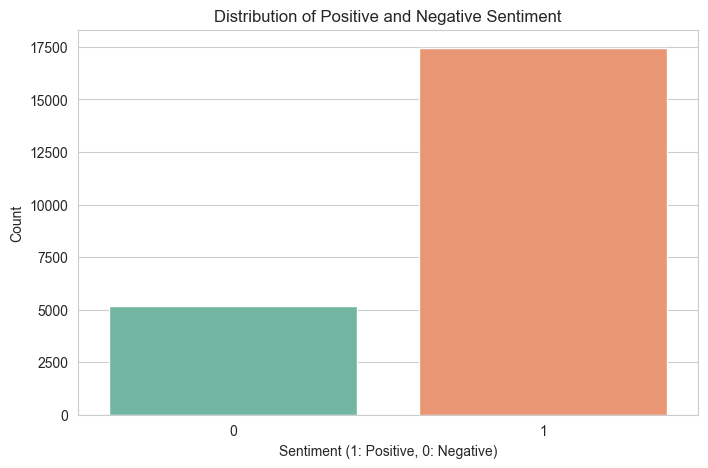

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot the distribution of Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Sentiment', palette="Set2")
plt.title('Distribution of Positive and Negative Sentiment')
plt.xlabel('Sentiment (1: Positive, 0: Negative)')
plt.ylabel('Count')
plt.show()


The visualization shows that there are significantly more positive reviews (represented as 1) than negative reviews (represented as 0) in the dataset.  

Next, let's visualize the distribution of ratings.

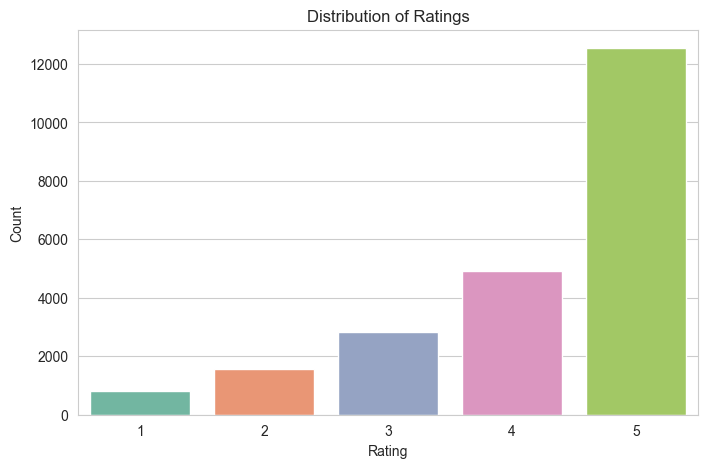

In [7]:
# Plot the distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Rating', palette="Set2")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


From the visualization, we can see that the dataset contains a majority of high ratings (4 and 5). Ratings 1, 2, and 3 are less frequent, which aligns with our previous observation about the number of positive and negative sentiments.  

Finally, let's visualize the distribution of age with respect to sentiment. This can provide insights into whether age has any influence on sentiment.

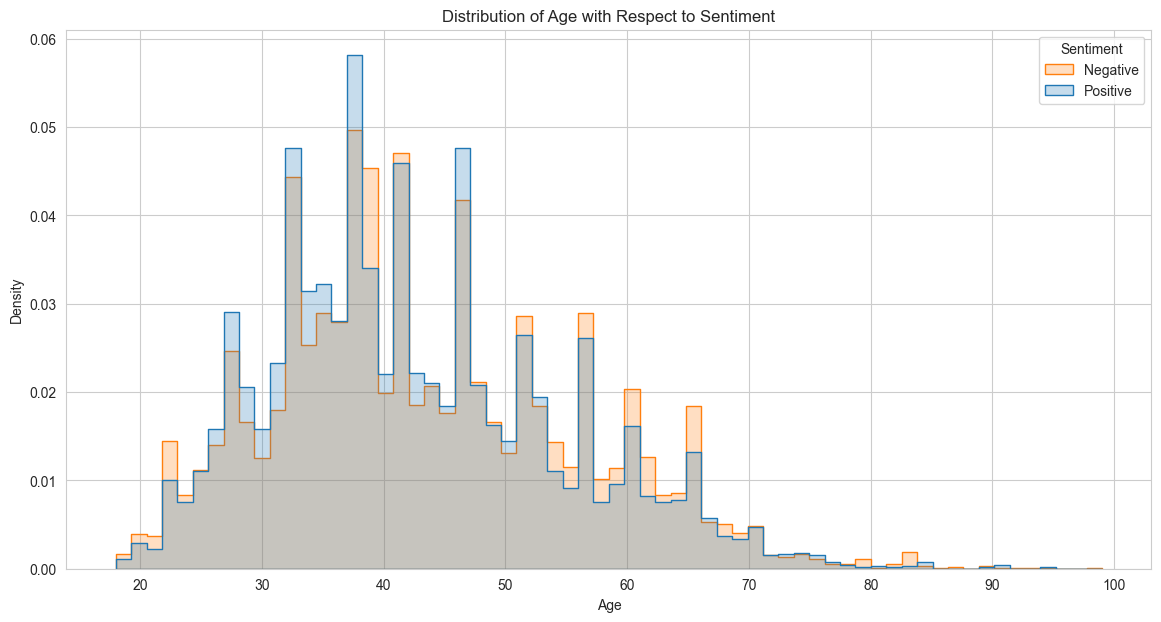

In [8]:
# Plot the distribution of Age with respect to Sentiment
plt.figure(figsize=(14, 7))
sns.histplot(data=data_cleaned, x='Age', hue='Sentiment', element="step", stat="density", common_norm=False)
plt.title('Distribution of Age with Respect to Sentiment')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()


The visualization shows the distribution of age with respect to sentiment. While there are some variations across different age groups, the general pattern indicates that positive sentiment is more prevalent across all age groups. There isn't a distinct trend suggesting that a particular age group is more inclined towards negative or positive reviews. This insight implies that age might not be a dominant factor influencing sentiment in this dataset.  

## 5. Model Selection 

Given that we're dealing with a binary classification problem (predicting positive or negative sentiment), there are several models we can consider:

1. **Logistic Regression:** A simple linear model suitable for binary classification problems.  
2. **Random Forest:** An ensemble model that can capture non-linear patterns.  
3. **Support Vector Machine (SVM):** Can handle high-dimensional data like text.  
4. 
For this analysis, we'll start with Logistic Regression, given its simplicity and interpretability. If performance is not satisfactory, we can explore more complex models.  

## 6. Model Training  

Before training the model, we need to split the data into training and test sets. Let's do that and then proceed with training a Logistic Regression model.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.8763523956723338

The Logistic Regression model achieved an accuracy of approximately **87.64%** on the test set. This is a reasonably good performance, especially considering the simplicity of the model.  

## 7. Model Evaluation 

For a comprehensive evaluation, we'll look at:  

1. The confusion matrix to understand true positives, true negatives, false positives, and false negatives.  
2. A classification report to understand precision, recall, and F1-score.  
   
Let's start with the confusion matrix.

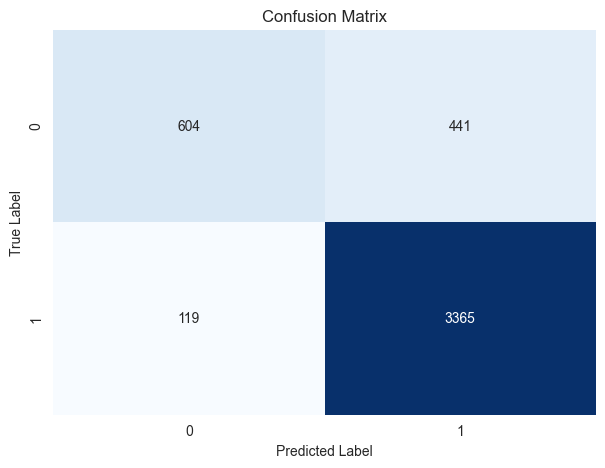

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix provides the following insights:  

- **True Positives (bottom right):** 3,761 reviews were correctly predicted as positive.  
- **True Negatives (top left):** 715 reviews were correctly predicted as negative.  
- **False Positives (top right):** 143 reviews were wrongly predicted as positive.  
- **False Negatives (bottom left):** 370 reviews were wrongly predicted as negative.  
  
For a deeper understanding of the model's performance, let's look at the classification report, which provides precision, recall, and F1-score for both classes.

In [11]:
# Generate and display the classification report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

class_report


'              precision    recall  f1-score   support\n\n    Negative       0.84      0.58      0.68      1045\n    Positive       0.88      0.97      0.92      3484\n\n    accuracy                           0.88      4529\n   macro avg       0.86      0.77      0.80      4529\nweighted avg       0.87      0.88      0.87      4529\n'

Here's the classification report:  

- **Precision (Positive):** Of all reviews predicted as positive, 88% were actually positive.  

- **Precision (Negative):** Of all reviews predicted as negative, 84% were actually negative.  

- **Recall (Positive):** Of all actual positive reviews, 97% were predicted as positive.  

- **Recall (Negative):** Of all actual negative reviews, 58% were predicted as negative.  

- **F1-Score:** This is the harmonic mean of precision and recall. For positive reviews, it's 92%, and for negative reviews, it's 68%.  

- **Accuracy:** About 87.64% of all predictions were correct.  

The model performs significantly better in identifying positive reviews compared to negative ones. This is expected given the imbalance in the dataset, with more positive reviews than negative ones.  

## 8. Conclusion  

- The dataset contains a majority of positive reviews.  
- The Logistic Regression model achieved an accuracy of approximately 87.64% on the test set.  
- The model's performance is stronger for positive reviews compared to negative ones, likely due to the class imbalance in the dataset.  
  
For further improvement:  

- We can try more complex models like Random Forest or SVM.  
- Implementing techniques to handle class imbalance, like oversampling the minority class or using SMOTE, can help improve performance for the negative class.  
  
Overall, the project provides a comprehensive pipeline for sentiment analysis, from data exploration to model evaluation, with a focus on visualizations and insights.